<a href="https://colab.research.google.com/github/Epsita-R/Epsita/blob/main/2348517_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Load and run the dataset
data = pd.read_csv('/content/Market_Basket_Optimisation (1).csv')
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check for null values
data.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [4]:
# Fill null values with "NA")
data_filled = data.fillna("NA")
print(data_filled.isnull().sum())

shrimp               0
almonds              0
avocado              0
vegetables mix       0
green grapes         0
whole weat flour     0
yams                 0
cottage cheese       0
energy drink         0
tomato juice         0
low fat yogurt       0
green tea            0
honey                0
salad                0
mineral water        0
salmon               0
antioxydant juice    0
frozen smoothie      0
spinach              0
olive oil            0
dtype: int64


In [5]:
#  convert the data into a binary matrix format
binary_matrix = data.notna().astype(int)
binary_matrix.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# Perform Apriori algorithm
frequent_itemsets = apriori(binary_matrix, min_support=0.05, use_colnames=True)
# Get association rules
association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(association_rules_df)


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
       support                                           itemsets
0     1.000000                                           (shrimp)
1     0.766133                                          (almonds)
2     0.585067                                          (avocado)
3     0.445867                                   (vegetables mix)
4     0.337067                                     (green grapes)
...        ...                                                ...
1018  0.052533  (whole weat flour, yams, avocado, tomato juice...
1019  0.052533  (whole weat flour, yams, tomato juice, cottage...
1020  0.052533  (whole weat flour, yams, avocado, tomato juice...
1021  0.052533  (whole weat flour, yams, avocado, tomato juice...
1022  0.052533  (whole weat flour, yams, avocado, tomato juice...

[1023 rows x 2 columns]

Association Rules:
            antecedents                                        consequents  \
0             (almonds)                                           

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


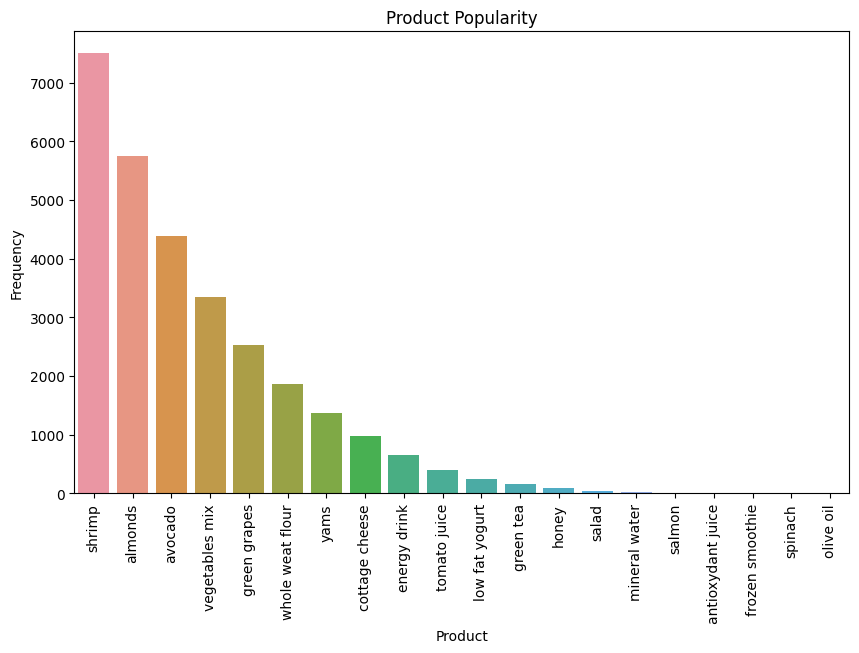

In [7]:
# Visualize Product Popularity using a bar chart
product_popularity = binary_matrix.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_popularity.index, y=product_popularity.values)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Product Popularity')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


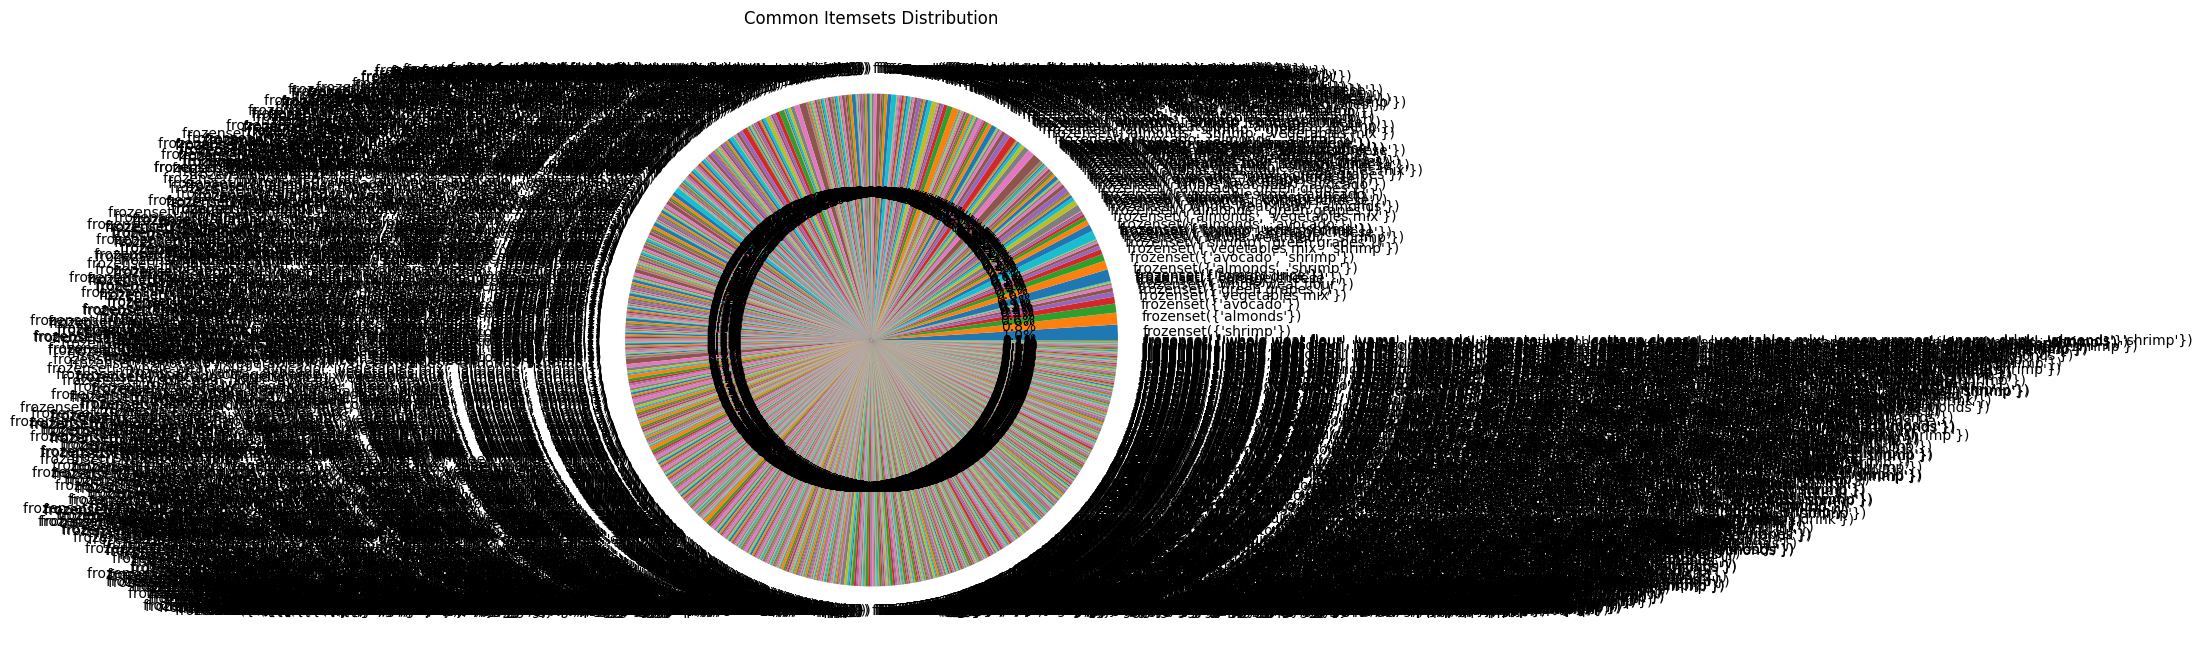

In [8]:
# Visualize Common Itemsets Distribution using a pie chart
itemset_counts = frequent_itemsets['support'] * len(data)
plt.figure(figsize=(8, 8))
plt.pie(itemset_counts, labels=frequent_itemsets['itemsets'], autopct='%1.1f%%')
plt.title('Common Itemsets Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


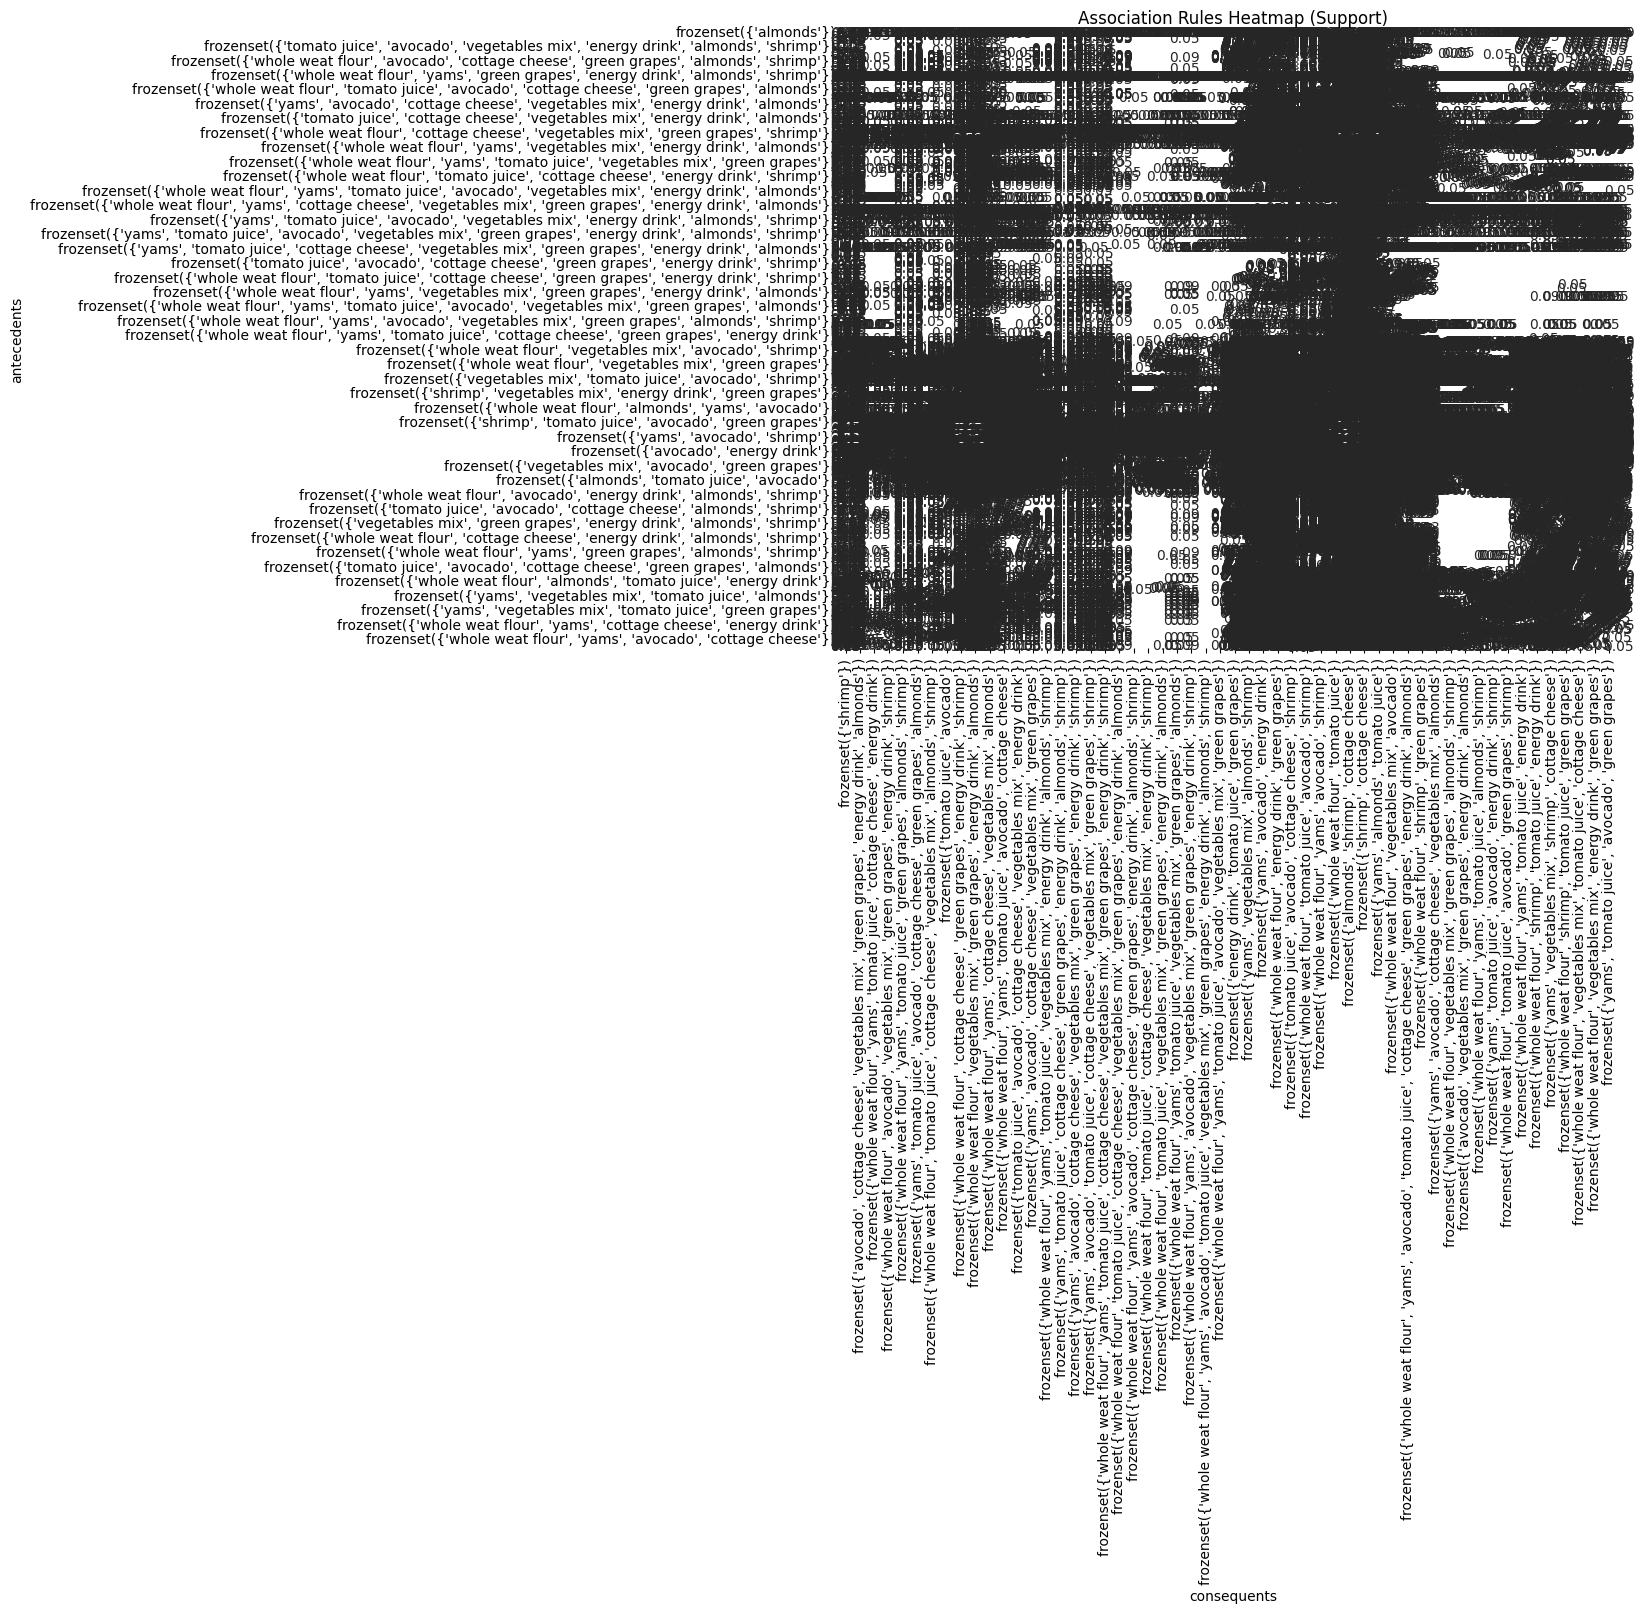

In [9]:
# Generate a heatmap for association rules
heatmap_data = association_rules_df.pivot_table(index='antecedents', columns='consequents', values='support')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
plt.title('Association Rules Heatmap (Support)')
plt.show()

In [ ]:
# Create a pivot table for heatmap
heatmap_data = association_rules_df.pivot_table(index='antecedents', columns='consequents', values=['support', 'confidence'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data['support'], annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
plt.title('Association Rules Strength Heatmap (Support)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data['confidence'], annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
plt.title('Association Rules Strength Heatmap (Confidence)')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np

# Store Layout Optimization Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(binary_matrix.T, cmap="coolwarm", cbar=False)
plt.title('Store Layout Optimization')
plt.xlabel('Transactions')
plt.ylabel('Products')
plt.show()

# Cross-Selling Strategy Matrix (Example using random data)
cross_selling_matrix = np.random.randint(2, size=(len(unique_products), len(unique_products)))
plt.figure(figsize=(10, 8))
sns.heatmap(cross_selling_matrix, cmap="Blues", cbar=True)
plt.title('Cross-Selling Strategy Matrix')
plt.xlabel('Products')
plt.ylabel('Products')
plt.show()

In [ ]:
# Define a function for personalized recommendations
def get_personalized_recommendations(basket):
    recommendations = set()
    for itemset in frequent_itemsets['itemsets']:
        if itemset.issubset(basket):
            recommendations.update(itemset)
    recommendations -= basket
    return recommendations

# Example usage of the personalized recommendations function
customer_basket = {'shrimp', 'green grapes', 'avocado'}
recommended_products = get_personalized_recommendations(customer_basket)
print("Recommended Products:", recommended_products)

In [ ]:
# Calculate the average lift before and after cross-selling strategy
average_lift_before = association_rules_df['lift'].mean()

# Simulate the effect of cross-selling strategy
# For simplicity, let's consider a 10% increase in the support of selected itemsets
simulated_support_increase = 1.1  # 10% increase
frequent_itemsets_simulated = apriori(binary_matrix, min_support=0.05 * simulated_support_increase, use_colnames=True)
association_rules_simulated = association_rules(frequent_itemsets_simulated, metric="lift", min_threshold=1)
average_lift_after = association_rules_simulated['lift'].mean()

# Calculate the improvement in average lift
lift_improvement = (average_lift_after - average_lift_before) / average_lift_before * 100

# Display the results
print("Average Lift before cross-selling strategy:", average_lift_before)
print("Average Lift after simulated cross-selling strategy:", average_lift_after)
print("Lift Improvement:", lift_improvement, "%")